To develop a comprehensive data analytics workflow utilizing Python's data science libraries—pandas for data manipulation, NumPy for numerical computations, Matplotlib and Seaborn for data visualization, SciPy and Statsmodels for statistical analysis, and the warnings module to manage and suppress unnecessary warnings. This workflow aims to facilitate efficient data processing, insightful visualization, and robust statistical modeling, thereby enhancing decision-making processes in data-driven projects.







***StatisticsProject***

Iporting Libraries

In [94]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import warnings
import statsmodels.api as sm
warnings.filterwarnings("ignore")

Loading the dataset

In [4]:
df=pd.read_csv(r"C:\Users\yaama\Desktop\2023_Green_Taxi_Trip_Data.csv")

In [5]:
df.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,01-01-2023 00:26,01-01-2023 00:37,N,1.0,166,143,1.0,2.58,14.9,1.0,0.5,4.03,0.0,NaN,1.0,24.18,1.0,1.0,2.75
1,2,01-01-2023 00:51,01-01-2023 00:57,N,1.0,24,43,1.0,1.81,10.7,1.0,0.5,2.64,0.0,NaN,1.0,15.84,1.0,1.0,0.00
2,2,01-01-2023 00:35,01-01-2023 00:41,N,1.0,223,179,1.0,0.00,7.2,1.0,0.5,1.94,0.0,NaN,1.0,11.64,1.0,1.0,0.00
3,1,01-01-2023 00:13,01-01-2023 00:19,N,1.0,41,238,1.0,1.30,6.5,0.5,1.5,1.70,0.0,NaN,1.0,10.20,1.0,1.0,0.00
4,1,01-01-2023 00:33,01-01-2023 00:39,N,1.0,41,74,1.0,1.10,6.0,0.5,1.5,0.00,0.0,NaN,1.0,8.00,1.0,1.0,0.00


Exploratory Data Analysis

In [7]:
df.shape

(787060, 20)

In [8]:
df.dtypes

VendorID                   int64
lpep_pickup_datetime      object
lpep_dropoff_datetime     object
store_and_fwd_flag        object
RatecodeID               float64
PULocationID               int64
DOLocationID               int64
passenger_count          float64
trip_distance            float64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
ehail_fee                float64
improvement_surcharge    float64
total_amount             float64
payment_type             float64
trip_type                float64
congestion_surcharge     float64
dtype: object

In [9]:
import pandas as pd
from datetime import datetime

# Custom function to try multiple datetime formats
def try_parsing_date(text):
    for fmt in ("%m/%d/%Y %I:%M:%S %p", "%m-%d-%Y %H:%M", "%Y-%m-%d %H:%M:%S"):
        try:
            return datetime.strptime(text, fmt)
        except (ValueError, TypeError):
            continue
    return pd.NaT  # Return NaT if none of the formats match

# Apply the function to both datetime columns
df['lpep_pickup_datetime'] = df['lpep_pickup_datetime'].apply(try_parsing_date)
df['lpep_dropoff_datetime'] = df['lpep_dropoff_datetime'].apply(try_parsing_date)

# (Optional) Check how many values couldn't be parsed
print("Unparsed pickup dates:", df['lpep_pickup_datetime'].isna().sum())
print("Unparsed dropoff dates:", df['lpep_dropoff_datetime'].isna().sum())


Unparsed pickup dates: 0
Unparsed dropoff dates: 0


In [10]:
df['duration']=df['lpep_dropoff_datetime']-df['lpep_pickup_datetime']
df['duration']=df['duration'].dt.total_seconds()/60

In [11]:
df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,duration
0,2,2023-01-01 00:26:00,2023-01-01 00:37:00,N,1.0,166,143,1.0,2.58,14.90,...,0.5,4.03,0.00,NaN,1.0,24.18,1.0,1.0,2.75,11.0
1,2,2023-01-01 00:51:00,2023-01-01 00:57:00,N,1.0,24,43,1.0,1.81,10.70,...,0.5,2.64,0.00,NaN,1.0,15.84,1.0,1.0,0.00,6.0
2,2,2023-01-01 00:35:00,2023-01-01 00:41:00,N,1.0,223,179,1.0,0.00,7.20,...,0.5,1.94,0.00,NaN,1.0,11.64,1.0,1.0,0.00,6.0
3,1,2023-01-01 00:13:00,2023-01-01 00:19:00,N,1.0,41,238,1.0,1.30,6.50,...,1.5,1.70,0.00,NaN,1.0,10.20,1.0,1.0,0.00,6.0
4,1,2023-01-01 00:33:00,2023-01-01 00:39:00,N,1.0,41,74,1.0,1.10,6.00,...,1.5,0.00,0.00,NaN,1.0,8.00,1.0,1.0,0.00,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
787055,2,2023-12-31 22:15:00,2023-12-31 22:35:00,NaN,NaN,97,37,NaN,9.87,20.28,...,0.0,4.26,0.00,NaN,1.0,25.54,NaN,NaN,NaN,20.0
787056,2,2023-12-31 23:17:00,2023-12-31 23:53:00,NaN,NaN,116,37,NaN,12.07,55.38,...,0.0,12.66,6.94,NaN,1.0,75.98,NaN,NaN,NaN,36.0
787057,2,2023-12-31 23:21:00,2023-12-31 23:33:00,NaN,NaN,65,80,NaN,3.84,16.93,...,0.0,3.59,0.00,NaN,1.0,21.52,NaN,NaN,NaN,12.0
787058,2,2023-12-31 23:15:00,2023-12-31 23:40:00,NaN,NaN,36,65,NaN,6.18,30.01,...,0.0,6.20,0.00,NaN,1.0,37.21,NaN,NaN,NaN,25.0


In [12]:
df=df[['passenger_count','payment_type','fare_amount','trip_distance','duration']]

In [13]:
df

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1.0,1.0,14.90,2.58,11.0
1,1.0,1.0,10.70,1.81,6.0
2,1.0,1.0,7.20,0.00,6.0
3,1.0,1.0,6.50,1.30,6.0
4,1.0,1.0,6.00,1.10,6.0
...,...,...,...,...,...
787055,NaN,NaN,20.28,9.87,20.0
787056,NaN,NaN,55.38,12.07,36.0
787057,NaN,NaN,16.93,3.84,12.0
787058,NaN,NaN,30.01,6.18,25.0


In [14]:
df.isnull().sum()

passenger_count    55613
payment_type       55613
fare_amount            0
trip_distance          0
duration               0
dtype: int64

In [15]:
55613/len(df)*100

7.06591619444515

In [16]:
df.dropna(inplace=True)

In [17]:
df

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1.0,1.0,14.9,2.58,11.000000
1,1.0,1.0,10.7,1.81,6.000000
2,1.0,1.0,7.2,0.00,6.000000
3,1.0,1.0,6.5,1.30,6.000000
4,1.0,1.0,6.0,1.10,6.000000
...,...,...,...,...,...
782186,1.0,2.0,21.2,4.47,15.333333
782187,1.0,1.0,56.9,14.44,28.266667
782188,1.0,2.0,17.7,3.18,13.983333
782189,1.0,2.0,6.5,1.02,2.433333


In [18]:
df['passenger_count']=df['passenger_count'].astype('int64')
df['payment_type']=df['payment_type'].astype('int64')

In [19]:
df[df.duplicated()]

,passenger_count,payment_type,fare_amount,trip_distance,duration
154,1,1,6.5,0.80,4.000000
170,1,1,3.0,0.00,0.000000
174,1,1,20.0,0.00,0.000000
198,1,1,5.8,0.47,4.000000
227,3,1,40.0,0.00,0.000000
...,...,...,...,...,...
782168,1,2,5.8,0.64,3.533333
782171,1,2,7.2,0.71,5.666667
782181,1,1,7.9,1.15,6.083333
782183,1,1,12.1,2.02,9.583333


In [20]:
df.drop_duplicates(inplace=True)

In [21]:
df['passenger_count'].value_counts(normalize=True)

passenger_count
1    0.795638
2    0.111004
5    0.037499
3    0.019799
6    0.017996
0    0.010864
4    0.007050
7    0.000078
8    0.000039
9    0.000033
Name: proportion, dtype: float64

In [22]:
df['payment_type'].value_counts(normalize=True)

payment_type
1    0.635494
2    0.353434
3    0.008125
4    0.002917
5    0.000031
Name: proportion, dtype: float64

In [23]:
df=df[df['payment_type']<3]
df=df[(df['passenger_count']>0) & (df['passenger_count']<6)]

In [24]:
df.shape

(470296, 5)

In [25]:
df['payment_type'].replace([1,2],['card','cash'],inplace=True)

In [26]:
df

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1,card,14.9,2.58,11.000000
1,1,card,10.7,1.81,6.000000
2,1,card,7.2,0.00,6.000000
3,1,card,6.5,1.30,6.000000
4,1,card,6.0,1.10,6.000000
...,...,...,...,...,...
782186,1,cash,21.2,4.47,15.333333
782187,1,card,56.9,14.44,28.266667
782188,1,cash,17.7,3.18,13.983333
782189,1,cash,6.5,1.02,2.433333


In [27]:
df.describe()

,passenger_count,fare_amount,trip_distance,duration
count,470296.000000,470296.000000,470296.000000,470296.000000
mean,1.331661,21.043673,3.635027,24.589779
std,0.878126,21.716199,65.983919,98.649050
min,1.000000,-1.500000,0.000000,0.000000
25%,1.000000,10.700000,1.320000,8.933333
50%,1.000000,16.300000,2.320000,14.000000
75%,1.000000,25.000000,4.130000,21.500000
max,5.000000,4003.000000,29151.880000,1440.000000


In [28]:
df=df[df['fare_amount']>0]
df=df[df['trip_distance']>0]
df=df[df['passenger_count']>0]

In [29]:
for col in ['fare_amount', 'trip_distance', 'duration']:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    IQR = q3 - q1
    lower_bound = q1 - 1.5 * IQR
    upper_bound = q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    #print(f"{col}: Remaining rows = {df.shape[0]}")

In [30]:
df

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1,card,14.9,2.58,11.000000
1,1,card,10.7,1.81,6.000000
3,1,card,6.5,1.30,6.000000
4,1,card,6.0,1.10,6.000000
5,1,cash,17.7,2.78,18.000000
...,...,...,...,...,...
782185,1,card,15.6,2.74,12.366667
782186,1,cash,21.2,4.47,15.333333
782188,1,cash,17.7,3.18,13.983333
782189,1,cash,6.5,1.02,2.433333


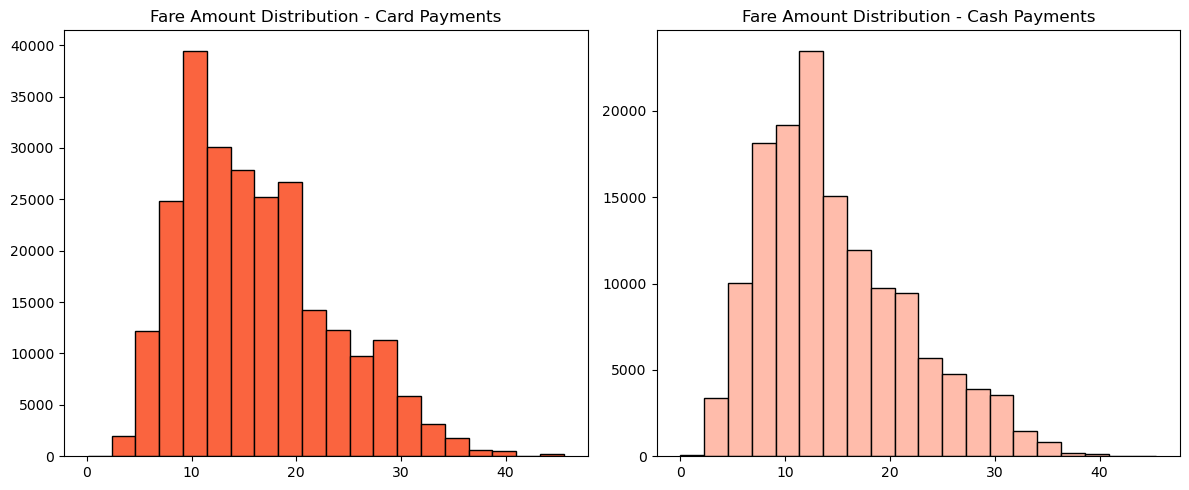

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))  # ✅ Corrected keyword
plt.subplot(1, 2, 1)
plt.title('Distribution of fare amount')
plt.hist(df[df['payment_type'] == 'card']['fare_amount'], histtype='barstacked',bins=20,edgecolor='k',color='#FA643F',label='card')
plt.title("Fare Amount Distribution - Card Payments")

plt.subplot(1, 2, 2)
plt.hist(df[df['payment_type'] == 'cash']['fare_amount'], histtype='barstacked',bins=20,edgecolor='k',color='#FFBCAB',label='cash')
plt.title("Fare Amount Distribution - Cash Payments")

plt.tight_layout()
#plt.legend()

plt.show()

In [32]:
df.groupby('payment_type').agg({'fare_amount': ['mean', 'std'], 'trip_distance': ['mean', 'std']})


fare_amount           trip_distance          
                    mean       std          mean       std
payment_type                                              
card           16.192620  7.184701      2.628942  1.631690
cash           14.788384  7.054806      2.352738  1.601205

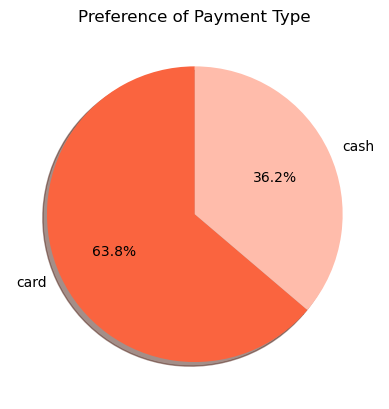

In [33]:
plt.pie(df['payment_type'].value_counts(normalize=True),
        labels=df['payment_type'].value_counts().index,
        startangle=90,
        shadow=True,
        autopct='%1.1f%%',
        colors=['#FA643F', '#FFBCAB'])
plt.title('Preference of Payment Type')
plt.show()

In [34]:
# Grouping and counting passenger_count per payment_type
passenger_count = df.groupby(['payment_type', 'passenger_count'])[['passenger_count']].count()

# Resetting column name (not `.remove()`, use `.rename()`)
passenger_count.rename(columns={'passenger_count': 'count'}, inplace=True)

# Resetting index for further analysis or plotting
passenger_count.reset_index(inplace=True)

In [35]:
passenger_count['perc']=(passenger_count['count']/passenger_count['count'].sum())*100

In [36]:
passenger_count

,payment_type,passenger_count,count,perc
0,card,1,203112,52.207842
1,card,2,27773,7.138763
2,card,3,4879,1.254097
3,card,4,1808,0.464728
4,card,5,10556,2.713311
5,cash,1,114786,29.504556
6,cash,2,16935,4.352967
7,cash,3,3113,0.800165
8,cash,4,800,0.205632
9,cash,5,5283,1.357941


In [37]:
df=pd.DataFrame(columns=['payment_type',1,2,3,4,5])
df['payment_type']=['card','cash']
df.iloc[0,1:]=passenger_count.iloc[0:5,-1]
df.iloc[1,1:]=passenger_count.iloc[5:,-1]
df

,payment_type,1,2,3,4,5
0,card,52.207842,7.138763,1.254097,0.464728,2.713311
1,cash,29.504556,4.352967,0.800165,0.205632,1.357941


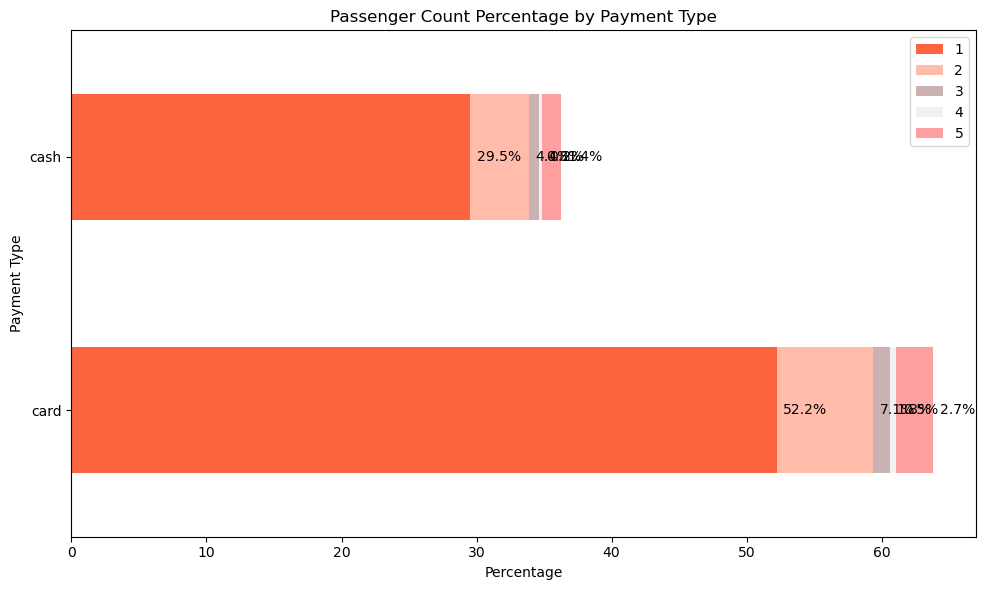

In [114]:
import matplotlib.pyplot as plt

# Plot and store the axes object
ax = df.plot(x='payment_type', kind='barh', stacked=True, 
             color=['#FA643F', '#FFBCAB', '#CBB2B2', '#F1F1F1', '#FD9F9F'], figsize=(10, 6))

# Add percentage labels
for p in ax.patches:
    width = p.get_width()
    if width > 0:
        ax.text(p.get_x() + width + 0.5, p.get_y() + p.get_height()/2,
                f'{width:.1f}%', va='center')

plt.title("Passenger Count Percentage by Payment Type")
plt.xlabel("Percentage")
plt.ylabel("Payment Type")
plt.tight_layout()
plt.show()

In [116]:
print(df.columns)

Index(['payment_type', 1, 2, 3, 4, 5], dtype='object')


Index(['VendorID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime',
       'store_and_fwd_flag', 'RatecodeID', 'PULocationID', 'DOLocationID',
       'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'ehail_fee', 'improvement_surcharge',
       'total_amount', 'payment_type', 'trip_type', 'congestion_surcharge'],
      dtype='object')


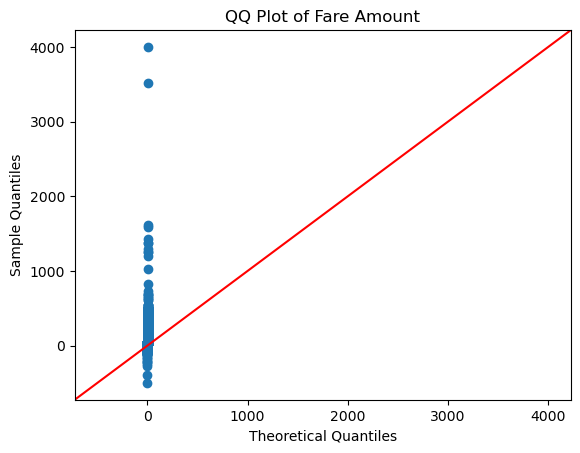

In [122]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# CSV se load karo
df = pd.read_csv(r"C:\Users\yaama\Desktop\2023_Green_Taxi_Trip_Data.csv")  # Replace with actual file name

# Column name check karo
print(df.columns)

# QQ plot bana lo
sm.qqplot(df['fare_amount'], line='45')
plt.title("QQ Plot of Fare Amount")
plt.show()


In [141]:
card_sample = df[df['payment_type'] == 'card']['fare_amount']
cash_sample = df[df['payment_type'] == 'cash']['fare_amount']

In [143]:
t_stats,p_value=st.ttest_ind(a=card_sample,b=cash_sample,equal_var=False)
print('T statistic',t_stats,'p-value',p_value)

T statistic nan p-value nan
